In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import seaborn as sb


# Loading the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/prajwalp111/data/refs/heads/main/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Pre-Processing

In [3]:
df.shape


(16598, 11)

In [4]:
missing_values = df.isnull().sum()
missing_percent = (missing_values/len(df))*100
print("missing values______________ \n",missing_values)
print("missing % _______________\n",missing_percent)

missing values______________ 
 Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
missing % _______________
 Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64


In [5]:
#df['Year'].fillna(df['Year'].median(),inplace=True)
df['Year'] = df['Year'].fillna(df['Year'].median())

In [6]:
df = df.dropna(subset=['Publisher'])

In [7]:
missing_values = df.isnull().sum()
missing_percent = (missing_values/len(df))*100
print("missing values \n",missing_values)
print("missing % \n",missing_percent)

missing values 
 Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
missing % 
 Rank            0.0
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64


# Data Visualization

### distribution of global sales across different game genres

In [8]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
print(genre_sales)

# df.groupby('Genre') -> grups dataset of Genre column
# ['Global_Sales'].sum() -> For each genre it calculates the total Global_sales by summing the 'Global_Sales' values.
# .sort_values(ascending=False) -> Sorts the total sales from highest to lowest (most popular genre at the top).

Genre
Action          1750.33
Sports          1329.35
Shooter         1037.32
Role-Playing     927.31
Platform         830.87
Misc             802.15
Racing           732.03
Fighting         445.70
Simulation       391.96
Puzzle           244.94
Adventure        238.77
Strategy         174.83
Name: Global_Sales, dtype: float64


<ipython-input-9-ebbc28339e04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=genre_sales.values, y=genre_sales.index, palette="viridis")


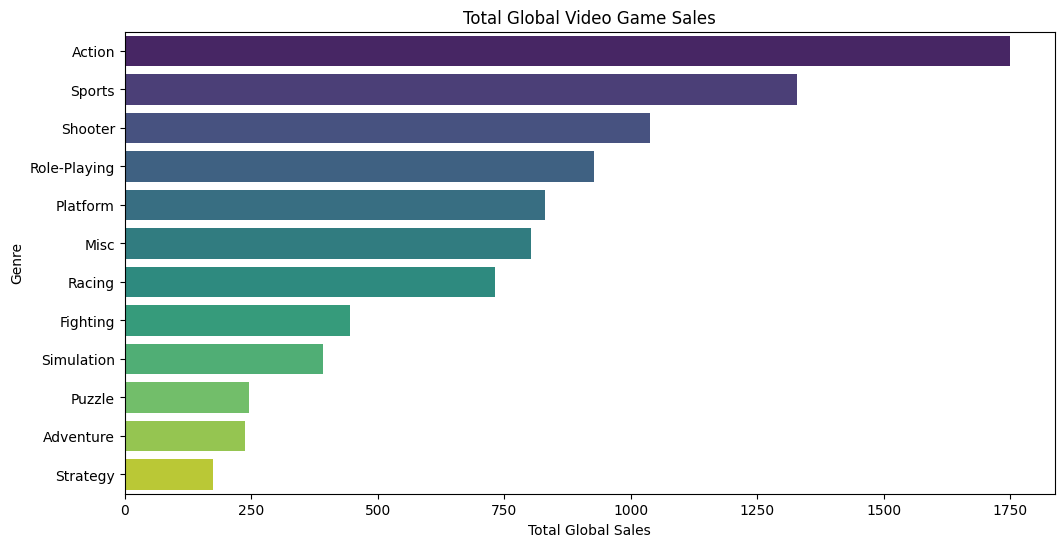

In [9]:
plt.figure(figsize=(12, 6))
sb.barplot(x=genre_sales.values, y=genre_sales.index, palette="viridis")
plt.xlabel('Total Global Sales')
plt.ylabel('Genre')
plt.title('Total Global Video Game Sales')
#plt.tight_layout()
plt.show()

### Correlation Between Regional Sales


In [10]:
df_sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]


<Axes: >

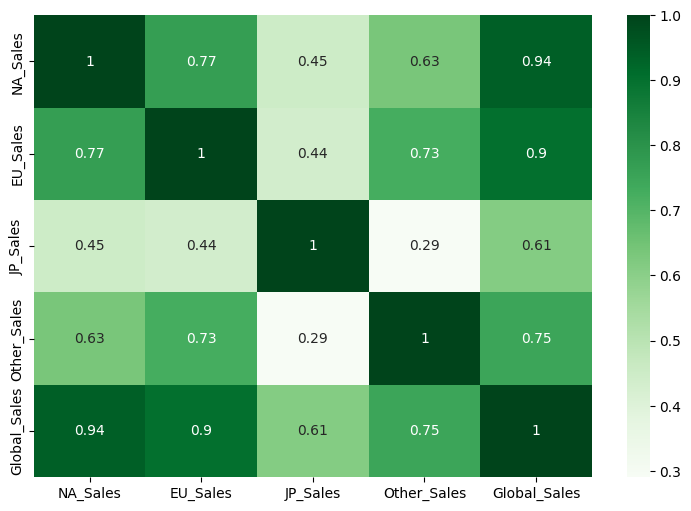

In [11]:
plt.figure(figsize=(9,6))
sb.heatmap(df_sales.select_dtypes(include = 'number').corr(),annot = True, cmap = 'Greens')

# Linear Regression Model

In [12]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [30]:
features = ['Year','NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales']
target = 'Global_Sales'

X = df[features]
y = df[target]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (13232, 5)
X_test (3308, 5)
y_train (13232,)
y_test (3308,)


In [32]:
y_test.head()

,Global_Sales
3945,0.51
1035,1.72
12102,0.07
9272,0.14
7822,0.19


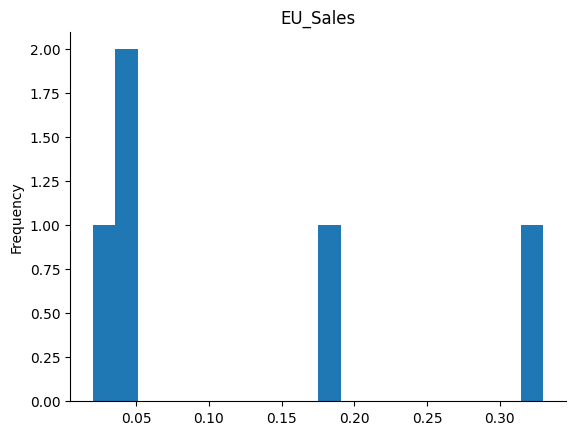

In [33]:
from matplotlib import pyplot as plt
_df_1['EU_Sales'].plot(kind='hist', bins=20, title='EU_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Training

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [16]:
y_pred = lr_model.predict(X_test)

In [17]:
# sample_input = [[2.5, 1.8, 0.3, 0.4]]
# predicted_sales = lr_model.predict(sample_input)
# print(f"Predicted Global Sales: {predicted_sales[0]:.2f} million units")   => 5

# Evaluation of model

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 0.0029
Root Mean Squared Error: 0.0052
R² Score: 1.0000


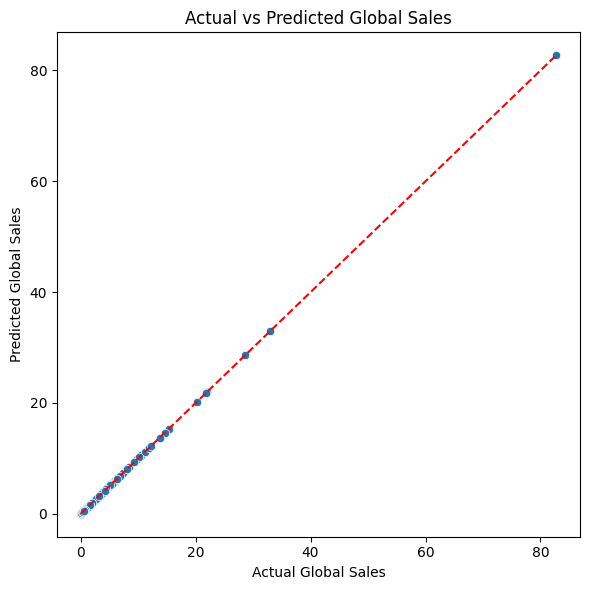

In [34]:
plt.figure(figsize=(6,6))
sb.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales")
plt.tight_layout()
plt.show()
